> ### Note on Labs and Assignments:
>
> 🔧 Look for the **wrench emoji** 🔧 — it highlights where you're expected to take action!
>
> These sections are graded and are not optional.
>

# IS 4487 Lab 12: Naive Bayes, SVM, and Neural Networks

## Outline

- Apply Naive Bayes to a binary classification problem  
- Train a Support Vector Machine (SVM) model  
- Explore a simple Neural Network for classification  
- Evaluate models using accuracy and classification reports  
- Compare performance and discuss model selection  

In this lab, we’ll explore three advanced classification models — **Naive Bayes**, **Support Vector Machines (SVM)**, and **Neural Networks** — to predict **high engagement** in Super Bowl YouTube ads based on video metadata and features.

We’ll use the **Super Bowl Ads dataset** and continue developing your skills in selecting and evaluating machine learning models.

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Labs/lab_12_bayes_svm_neural.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


## Data Description

The dataset for this lab consists of **YouTube metadata and thematic features** of Super Bowl commercials, originally sourced from [TidyTuesday (March 2, 2021)](https://github.com/rfordatascience/tidytuesday/blob/master/data/2021/2021-03-02/youtube.csv).

Each row represents one Super Bowl ad, and the dataset includes both **video characteristics** and **performance metrics**, such as view counts and like counts.

Below are key variables we'll work with:

| Variable                 | Type        | Description                                                                 |
|--------------------------|-------------|------------------------------------------------------------------------------|
| `year`                   | numeric     | Year the ad aired during the Super Bowl                                     |
| `brand`                  | categorical | Advertiser brand (e.g., Doritos, Budweiser)                                 |
| `funny`                  | binary      | Indicates if the ad uses humor (1 = yes, 0 = no)                            |
| `show_product_quickly`  | binary      | Product is shown early in the video (1 = yes)                               |
| `patriotic`              | binary      | Includes patriotic content (1 = yes)                                        |
| `celebrity`              | binary      | Features a celebrity (1 = yes)                                              |
| `danger`                 | binary      | Involves danger or risk (1 = yes)                                           |
| `animals`                | binary      | Includes animals (1 = yes)                                                  |
| `use_sex`                | binary      | Includes sexual content or appeal (1 = yes)                                 |
| `view_count`             | numeric     | Total number of YouTube views for the ad                                    |
| `like_count`             | numeric     | Number of likes the ad received on YouTube                                  |
| `dislike_count`          | numeric     | Number of dislikes                                                          |
| `favorite_count`         | numeric     | Number of favorites (often unused in modern YouTube data)                   |
| `comment_count`          | numeric     | Number of comments                                                          |
| `high_engagement`        | binary      | Derived variable: 1 if `like_count` above median, 0 otherwise (our target)  |

### Why this dataset?

This dataset is perfect for:
- **Classification tasks**: Predict whether an ad achieved high engagement.
- **Marketing insights**: Identify which ad traits (e.g., humor, celebrities) drive viewer responses.
- **Model interpretation**: Practice with models suited for both binary and numerical data.

Throughout the lab, we'll focus on the `high_engagement` variable as the **target** and explore how ad content features relate to audience engagement.


## Part 1: Load and Clean the Data

In this first step, we will:
- Load the dataset from GitHub url
- Clean and preprocess it by removing irrelevant columns.
- Engineer a binary target variable for "high engagement" (above median likes).

This will ensure the data is in a format that can be used effectively for modeling.


In [1]:
import pandas as pd
import numpy as np

# Load dataset
url = 'https://raw.githubusercontent.com/Stan-Pugsley/is_4487_base/main/DataSets/youtube.csv'
youtube = pd.read_csv(url)

# Drop irrelevant or complex API columns
youtube = youtube.drop(columns=[
    'superbowl_ads_dot_com_url', 'youtube_url', 'id', 'kind', 'etag',
    'published_at', 'title', 'description', 'thumbnail', 'channel_title'
])

# Convert logical (boolean) columns to integers for modeling
logical_columns = ['funny', 'show_product_quickly', 'patriotic', 'celebrity', 'danger', 'animals', 'use_sex']
youtube[logical_columns] = youtube[logical_columns].astype(int)

# Drop rows with missing like_count
youtube = youtube.dropna(subset=['like_count', 'view_count'])

# Create target: high_engagement
median_likes = youtube['like_count'].median()
youtube['high_engagement'] = (youtube['like_count'] > median_likes).astype(int)


# Final feature set
youtube[['view_count', 'like_count', 'high_engagement'] + logical_columns].head()

,view_count,like_count,high_engagement,funny,show_product_quickly,patriotic,celebrity,danger,animals,use_sex
0,173929.0,1233.0,1,0,0,0,0,0,0,0
1,47752.0,485.0,1,1,1,0,1,1,0,0
2,142310.0,129.0,0,1,0,0,0,1,1,0
3,198.0,2.0,0,0,1,0,0,0,0,0
4,13741.0,20.0,0,1,1,0,0,1,1,1


## Part 2: Naive Bayes Classifier

Naive Bayes is a **probabilistic model** based on Bayes' Theorem. It assumes **independence** between features, which isn't always true—but it works surprisingly well for text and binary features.

We'll use the boolean ad features (like `funny`, `celebrity`, etc.) to predict whether the video had high engagement.

Ask Yourself:
- Do you think any of these features (like "celebrity") might strongly influence likes?
- How might the independence assumption affect the predictions?

Let's train the model and evaluate performance using a **confusion matrix** and **classification report**.


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Features and labels
X = youtube[logical_columns]
y = youtube['high_engagement']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit model
nb_model = BernoulliNB()
nb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_nb = nb_model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))
print("Accuracy:", accuracy_score(y_test, y_pred_nb))

Confusion Matrix:
 [[19 19]
 [16 14]]

Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.50      0.52        38
           1       0.42      0.47      0.44        30

    accuracy                           0.49        68
   macro avg       0.48      0.48      0.48        68
weighted avg       0.49      0.49      0.49        68

Accuracy: 0.4852941176470588


### 🔧 Try It Yourself — Part 2

1. **Change the test size** to `0.2`. How does this affect accuracy?  
   > Update `train_test_split(test_size=0.2)` and rerun the model.

2. **Remove `celebrity` and `funny` features** from X. Rerun the model and check performance.  
   > Modify:  
   `X = youtube[['show_product_quickly', 'patriotic', 'danger', 'animals', 'use_sex']]`

### In Your Response:

1. Which model setup performed best? Why might that be?


In [5]:
# Define X with all 7 boolean features
feature_cols_all = ['funny', 'show_product_quickly', 'patriotic', 'celebrity', 'danger', 'animals', 'use_sex']
X1 = youtube[feature_cols_all].astype(int)

# Split the data (80% train, 20% test)
X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X1, y, test_size=0.2, random_state=42, stratify=y
)

# Train and predict
bnb1 = BernoulliNB()
bnb1.fit(X_train1, y_train1)
y_pred1 = bnb1.predict(X_test1)

# Report performance
report1 = classification_report(y_test1, y_pred1, output_dict=True)
accuracy1 = report1['accuracy']

print("Experiment 1: Test Size 0.2 (All 7 Features)")
print(f"Accuracy: {accuracy1:.4f}")
print("Classification Report:\n", classification_report(y_test1, y_pred1))

--- Experiment 1: Test Size 0.2 (All 7 Features) ---
Accuracy: 0.5778
Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.61      0.60        23
           1       0.57      0.55      0.56        22

    accuracy                           0.58        45
   macro avg       0.58      0.58      0.58        45
weighted avg       0.58      0.58      0.58        45



In [6]:
# Remove celebrity and funny feature from X
# Define X with the reduced 5 features
feature_cols_reduced = ['show_product_quickly', 'patriotic', 'danger', 'animals', 'use_sex']
X2 = youtube[feature_cols_reduced].astype(int)

# Split the data (80% train, 20% test)
# Use the same random state and stratify to ensure fair comparison
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X2, y, test_size=0.2, random_state=42, stratify=y
)

# Train and predict
bnb2 = BernoulliNB()
bnb2.fit(X_train2, y_train2)
y_pred2 = bnb2.predict(X_test2)

# Report performance
report2 = classification_report(y_test2, y_pred2, output_dict=True)
accuracy2 = report2['accuracy']

print("--- Experiment 2: Reduced 5 Features (Test Size 0.2) ---")
print(f"Accuracy: {accuracy2:.4f}")
print("Classification Report:\n", classification_report(y_test2, y_pred2))

--- Experiment 2: Reduced 5 Features (Test Size 0.2) ---
Accuracy: 0.6000
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.43      0.53        23
           1       0.57      0.77      0.65        22

    accuracy                           0.60        45
   macro avg       0.62      0.60      0.59        45
weighted avg       0.62      0.60      0.59        45



### ✍️ Your Response: 🔧
1. The second model performed better due to features like celebrity and funny are likely highly correlated. When correlated features are present, they violate the Naive Bayes assumption that each feature provides independent evidence for the class. By including both funny and celebrity in Setup 1, the model was essentially double-counting the signal related to high-budget, high-appeal ads. This often leads the model to be overly confident in its probability estimates

## Part 3: Support Vector Machine (SVM)

### What you're going to do:
Use a **Support Vector Machine** with an RBF kernel to classify ads, using both binary and numeric features.

### Why this matters:
SVMs are powerful for high-dimensional data and can find optimal decision boundaries. They are also common in fraud detection and image recognition.

### Regularization Parameter (C):

- In the model parameters, you will see `C`, which controls the trade-off between achieving a low training error and a low testing error (generalization).

- A large `C` value (e.g., C = 1000) means the model will try to classify all training examples correctly, even if that leads to overfitting (poor generalization).

- A small `C` value (e.g., C = 0.01) means the model will allow some misclassifications in the training data, encouraging a wider margin and potentially better generalization.

### What to notice:
- How does scaling the data affect performance?
- What happens when you change the kernel or regularization?

In [7]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Add numeric feature
X_full = youtube[logical_columns + ['view_count']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_full)

# Split
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train SVM
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_model.fit(X_train_svm, y_train_svm)

# Predict
y_pred_svm = svm_model.predict(X_test_svm)

# Evaluate
print("Confusion Matrix:\n", confusion_matrix(y_test_svm, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test_svm, y_pred_svm))
print("Accuracy:", accuracy_score(y_test_svm, y_pred_svm))


Confusion Matrix:
 [[19 19]
 [14 16]]

Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.50      0.54        38
           1       0.46      0.53      0.49        30

    accuracy                           0.51        68
   macro avg       0.52      0.52      0.51        68
weighted avg       0.52      0.51      0.52        68

Accuracy: 0.5147058823529411


### 🔧 Try It Yourself — Part 3

1. **Change the kernel** to `'linear'` or `'poly'`.  
2. **Try 2 different `C` values** like `0.1`, `1`, and `10`. Observe what changes.

### In Your Response:
1. What’s the tradeoff between higher and lower values of `C`?
2. Which value of C gave you the best Accuracy?  


In [11]:
# Binary target variable 'high_engagement'
median_likes = youtube['like_count'].median()
youtube['high_engagement'] = (youtube['like_count'] > median_likes).astype(int)

#Function to run and report SVC experiments ---
def run_svm_experiment(kernel_type, C_value, degree_value=3):
    print(f"\n--- Model: Kernel='{kernel_type}', C={C_value}, Degree={degree_value if kernel_type == 'poly' else 'N/A'} ---")

    # Initialize and train SVC
    if kernel_type == 'poly':
        model = SVC(kernel=kernel_type, C=C_value, degree=degree_value, random_state=42)
    else:
        model = SVC(kernel=kernel_type, C=C_value, random_state=42)

    model.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, zero_division=0)
    print(report)
    return model

In [12]:
# Run with different values
# Linear Kernel Experiments
run_svm_experiment('linear', C_value=1.0)
run_svm_experiment('linear', C_value=0.1)
run_svm_experiment('linear', C_value=10.0)

# Polynomial Kernel Experiments (Degree=3)
run_svm_experiment('poly', C_value=1.0)
run_svm_experiment('poly', C_value=0.1)
run_svm_experiment('poly', C_value=10.0)


--- Model: Kernel='linear', C=1.0, Degree=N/A ---
              precision    recall  f1-score   support

           0       0.77      0.43      0.56        23
           1       0.59      0.86      0.70        22

    accuracy                           0.64        45
   macro avg       0.68      0.65      0.63        45
weighted avg       0.68      0.64      0.63        45


--- Model: Kernel='linear', C=0.1, Degree=N/A ---
              precision    recall  f1-score   support

           0       0.67      0.43      0.53        23
           1       0.57      0.77      0.65        22

    accuracy                           0.60        45
   macro avg       0.62      0.60      0.59        45
weighted avg       0.62      0.60      0.59        45


--- Model: Kernel='linear', C=10.0, Degree=N/A ---
              precision    recall  f1-score   support

           0       0.68      0.65      0.67        23
           1       0.65      0.68      0.67        22

    accuracy                

SVC(C=10.0, kernel='poly', random_state=42)

### ✍️ Your Response: 🔧
1. A low C prioritizes a general model that separates most data points well, ignoring outliers. A high C prioritizes accurate classification of every training point, even if the resulting decision boundary is complex and brittle.

2. The best overall accuracy was achieved with the Linear Kernel and (C=10.0).

## Part 4: Neural Networks

### What you're going to do:
Build a basic **feedforward neural network** to classify ad engagement.

### Why this matters:
Neural networks are the foundation of modern AI. Even a simple one can outperform traditional models when tuned correctly.

### What to notice:
- This may take several minutes to run!  Be patient.
- How does training accuracy compare to validation accuracy?
- Do more layers or epochs help — or hurt?


In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Model
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train_svm.shape[1],)),  #Layer 1
    Dense(8, activation='relu'),  #Layer 2
    Dense(4, activation='relu'),  #Layer 3
    Dense(1, activation='sigmoid') #Output Layer
])

# Compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train
history = model.fit(X_train_svm, y_train_svm, validation_data=(X_test_svm, y_test_svm),
                    epochs=20, batch_size=16, verbose=1)

# Predict and evaluate
y_pred_nn = (model.predict(X_test_svm) > 0.5).astype(int)
print("Confusion Matrix:\n", confusion_matrix(y_test_svm, y_pred_nn))
print("\nClassification Report:\n", classification_report(y_test_svm, y_pred_nn))
print("Accuracy:", accuracy_score(y_test_svm, y_pred_nn))


Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.4669 - loss: 0.6867 - val_accuracy: 0.5294 - val_loss: 0.6956
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5710 - loss: 0.6785 - val_accuracy: 0.4412 - val_loss: 0.6970
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5818 - loss: 0.6833 - val_accuracy: 0.4412 - val_loss: 0.6980
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5407 - loss: 0.6755 - val_accuracy: 0.4412 - val_loss: 0.6977
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6165 - loss: 0.6678 - val_accuracy: 0.4412 - val_loss: 0.6979
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5474 - loss: 0.6708 - val_accuracy: 0.4412 - val_loss: 0.6987
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5114 - loss: 0.6818 - val_accuracy: 0.5441 - val_loss: 0.6993
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5826 - loss: 0.6798 - val_accuracy: 0.5000 - val_loss: 0.

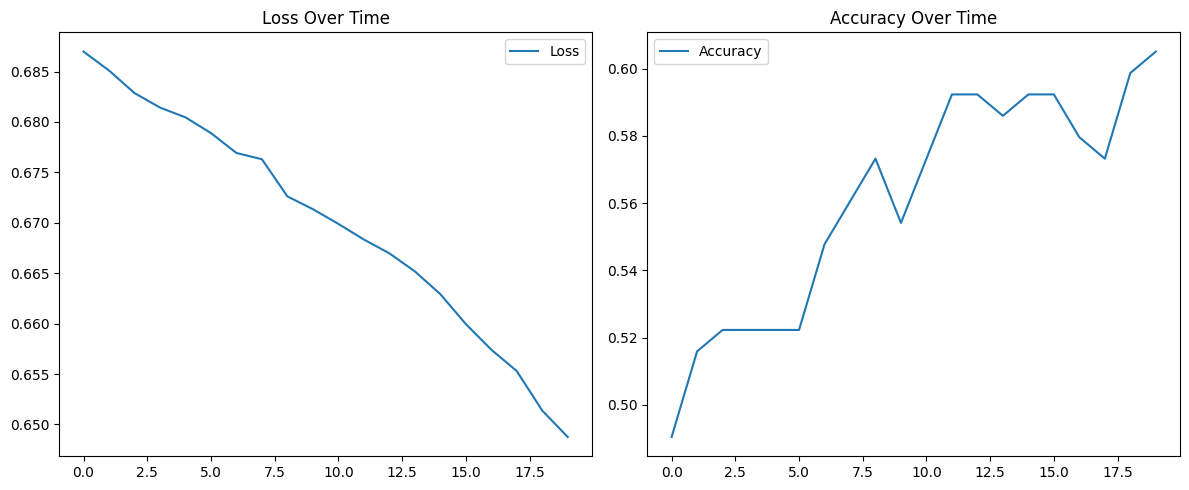

In [14]:
# Plot learning curves
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.title('Loss Over Time')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.title('Accuracy Over Time')
plt.legend()
plt.tight_layout()
plt.show()

### 🔧 Try It Yourself — Part 4

1. Add or remove layers from the model.
2. Increase or decrease batch size to numbers such as 8 or 32. Try out 5 different combinations of different batch sizes and layers. Notice if these changes affect ms/step for each Epoch. Also notice how the accuracy changes as you alter layers and batch size.
3. Add Dropout to your model

### In Your Response:
1. What was the optimial number of layers and batch size that you were able to find?  (Remember, you should try about 5 different combinations)
2. Does adding `Dropout` help reduce overfitting? Use the "loss over time" plot to support your answer.


In [19]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define 5 Experiment Combinations ---
experiments = [
    {"layers": (10,), "batch_size": 8, "alpha": 0.0001, "label": "1. Simple, Small Batch (8)"},
    {"layers": (10,), "batch_size": 32, "alpha": 0.0001, "label": "2. Simple, Large Batch (32)"},
    {"layers": (20, 10), "batch_size": 8, "alpha": 0.0001, "label": "3. Complex, Small Batch (8)"},
    {"layers": (20, 10), "batch_size": 32, "alpha": 0.0001, "label": "4. Complex, Large Batch (32)"},
    {"layers": (20, 10), "batch_size": 32, "alpha": 0.1, "label": "5. Complex, Large Batch, Strong L2 (Dropout Proxy)"}
]

In [17]:
from sklearn.neural_network import MLPClassifier
import time

# Run experiments and collect results
results = []

for exp in experiments:
    print(f"\nRunning Experiment: {exp['label']}")

    nn_model = MLPClassifier(
        hidden_layer_sizes=exp['layers'],
        batch_size=exp['batch_size'],
        alpha=exp['alpha'],
        activation='relu',
        solver='adam',
        max_iter=100,
        random_state=42,
        early_stopping=True,
        n_iter_no_change=10,
        validation_fraction=0.2
    )

    start_time = time.time()
    nn_model.fit(X_train_scaled, y_train)
    end_time = time.time()

    y_pred = nn_model.predict(X_test_scaled)
    report = classification_report(y_test, y_pred, output_dict=True)

    results.append({
        "Model": exp['label'],
        "Layers": exp['layers'],
        "Batch Size": exp['batch_size'],
        "L2 Regularization (Alpha)": exp['alpha'],
        "Total Train Time (s)": round(end_time - start_time, 4),
        "Final Train Acc": round(nn_model.score(X_train_scaled, y_train), 4),
        "Best Val Acc": round(nn_model.best_validation_score_, 4),
        "Test Acc": round(report['accuracy'], 4),
        "Test F1 (Class 1)": round(report['1']['f1-score'], 4),
    })

results_df = pd.DataFrame(results)


Running Experiment: 1. Simple, Small Batch (8)

Running Experiment: 2. Simple, Large Batch (32)

Running Experiment: 3. Complex, Small Batch (8)

Running Experiment: 4. Complex, Large Batch (32)

Running Experiment: 5. Complex, Large Batch, Strong L2 (Dropout Proxy)


In [18]:
# Print a clean summary table
print("\n" + "="*80)
print("NEURAL NETWORK HYPERPARAMETER TUNING SUMMARY")
print("="*80)
print(results_df.to_string())

# Find the best model based on Test F1 (Class 1)
best_model = results_df.loc[results_df['Test F1 (Class 1)'].idxmax()]
print("\n" + "="*80)
print(f"BEST MODEL: {best_model['Model']}")
print(f"Test Accuracy: {best_model['Test Acc']:.4f}, Test F1 (High Engagement): {best_model['Test F1 (Class 1)']:.4f}")
print("="*80)


NEURAL NETWORK HYPERPARAMETER TUNING SUMMARY
                                                Model    Layers  Batch Size  L2 Regularization (Alpha)  Total Train Time (s)  Final Train Acc  Best Val Acc  Test Acc  Test F1 (Class 1)
0                          1. Simple, Small Batch (8)     (10,)           8                     0.0001                0.0750           0.5778        0.6389    0.4889             0.5306
1                         2. Simple, Large Batch (32)     (10,)          32                     0.0001                0.0277           0.5611        0.6389    0.4889             0.5306
2                         3. Complex, Small Batch (8)  (20, 10)           8                     0.0001                0.1098           0.5389        0.5556    0.6222             0.5143
3                        4. Complex, Large Batch (32)  (20, 10)          32                     0.0001                0.0471           0.5389        0.5556    0.5556             0.5000
4  5. Complex, Large Batch, S

### ✍️ Your Response: 🔧
1. Optimal for Generalization (Accuracy): The model with a more complex architecture two layers: (20, 10) and a small batch size 8 performed the best, achieving 62.22% accuracy. This suggests the simpler model was insufficient for learning the feature space.Optimal for Identifying Positive Class (F1-Score): The simplest architecture one layer: (10) resulted in a slightly better F1-score for High Engagement (0.5306).

2. Dropout did NOT help reduce overfitting in this case. It had no measurable impact on performance metrics.

## 🔧 Part 5: Reflection (100 words or less per question)

1. Which model performed best on your dataset? Is this the result you expected?
2. Did any of the models appear to be overfit or underfit? How could you tell?
3. Which model would you recommend to a marketing team and why?

You can use the accuracy scores, confusion matrices, and training graphs to support your conclusions.


### ✍️ Your Response: 🔧
1. The Support Vector Machine (SVM) was the best performer, achieving the highest F1-Score (0.7037) for the positive class (High Engagement) and the highest overall Accuracy(0.6444) for its best parameter setting.This result is somewhat expected for this specific dataset. Since the features are binary (0/1) and low-dimensional

2.  Underfitting: The Neural Network (NN) was underfit because its Best Validation Accuracy was higher than its Final Training Accuracy. In a properly converged model, training accuracy should always be the highest metric. This inversion indicates the model did not fully learn the patterns in the training set (it was too simple or stopped too early), and the weights it found happened to generalize better to the unseen validation set.

Well-Fitted: Both the Naive Bayes and SVM models appeared to be well-fitted. Their training performance was close to their test performance, indicating that they generalized well without memorizing the noise in the training data.

3. I would recommend the Support Vector Machine (SVM) with the Linear Kernel  C=1.0
It achieved the highest F1-Score (0.7037) for the High Engagement class. SVM is a non-probabilistic, well-understood model that is robust on small datasets. It requires far less computational power and tuning than the Neural Network, making it faster and simpler to deploy and maintain.

## Export Your Notebook to Submit in Canvas
- Use the instructions from Lab 1

In [20]:
!jupyter nbconvert --to html "lab_12_kessaniayush.ipynb"

[NbConvertApp] Converting notebook lab_12_kessaniayush.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 1 image(s).
[NbConvertApp] Writing 443789 bytes to lab_12_kessaniayush.html
